<a href="https://colab.research.google.com/github/rde6mn/visualization/blob/main/visulization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

I did Q1

In [ ]:
! git clone https://github.com/DS3001/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [4]:
#load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')

In [ ]:
print(df.shape)

(3798, 63)


There are 3798 observations and 63 variables

In [ ]:
#print list of all variables
print(list(df.columns.values))

['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vs

In [ ]:
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



There are fewer 2 year colleges than 4 year, an public colleges make up the majority of all colleges. Majority of colleges are 4 yr private not for profit. 2 yr private not for profit colleges make up the smallers portion of all colleges.

<Axes: xlabel='grad_100_value', ylabel='Count'>

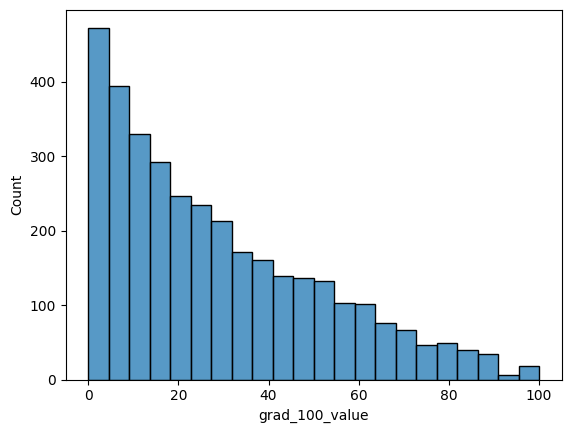

In [ ]:
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

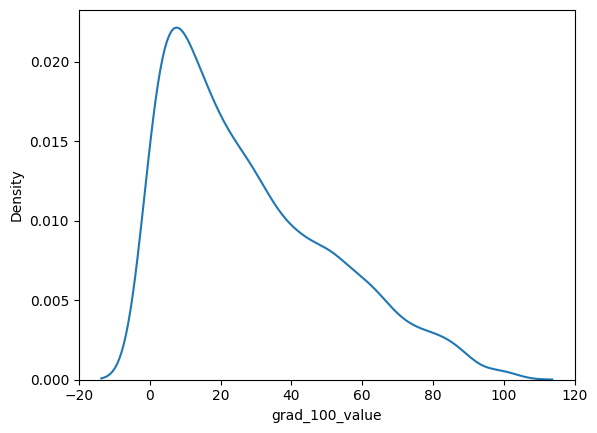

In [ ]:
sns.kdeplot(df['grad_100_value'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='grad_100_value'>

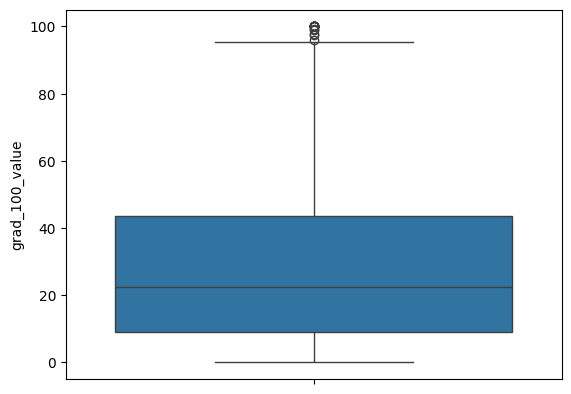

In [ ]:
sns.boxplot(df['grad_100_value'])

In [ ]:
df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

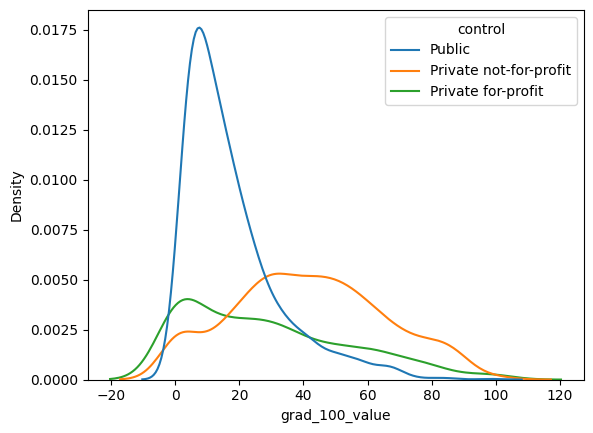

In [ ]:
sns.kdeplot(data=df,x='grad_100_value',hue='control')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

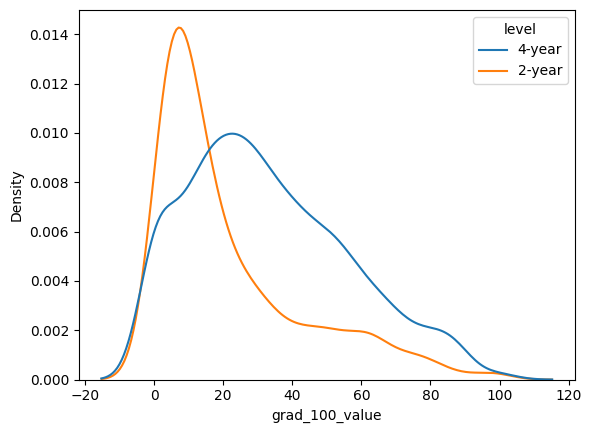

In [ ]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

In [ ]:
df.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [ ]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

The mean grad rate is about 12 points higher for 4 year colleges. Among types of colleges, private not for profit has the highest avg graduation rate at 41%, and private for profit has the second highest rate at 29%.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [ ]:
df = pd.read_csv('/content/OPIOID_TREATMENT_PROGRAM_PROVIDERS_09302024.csv')

2. THe data dictionary does not describe how missing values are handled for any type of variable. It only describes what the values the variables are supposed to store. I think this is not a very good data dictionary because it leaves out a lot of information such as the types of the variables and how the missing values are handled.

3. State and NPI are interesting because I would think that there aren't a large number of providers (NPI) for opioid treatments. I also don't really hear about which states have treatments, so I would be interested to see if there are certain states that hae a larger number of providers for opioid treatments. I am interested to see if my assumptions are true.


In [ ]:
print( df.shape, '\n')
df.head()

(1517, 9) 



,NPI,PROVIDER NAME,ADDRESS LINE 1,ADDRESS LINE 2,CITY,STATE,ZIP,MEDICARE ID EFFECTIVE DATE,PHONE
0,1003008301,"CENTER FOR COMMUNITY ALTERNATIVES,",25 CHAPEL ST,STE 701,BROOKLYN,NY,11201-1917,5/1/2024,7188589658
1,1003081399 1013055110,BAART BEHAVIORAL HEALTH SERVICES IN,617 COMSTOCK RD,STE 5,BERLIN,VT,05602-8498,1/1/2020,8022232003
2,1003150004,AMS OF WISCONSIN LLC,9532 E 16 FRONTAGE RD,STE 100,ONALASKA,WI,54650-6742,1/1/2020,9202322332
3,1003362484,BHG XLII LLC,5715 PRINCESS ANNE RD,NaN,VIRGINIA BEACH,VA,23462-3222,1/1/2020,7579620748
4,1003368945,RTS EDGEWOOD,2205 PULASKI HIGHWAY,NaN,EDGEWOOD,MD,21040,10/13/2020,4434569001


In [ ]:
print(df['NPI'].unique(), '\n')

['1003008301' '1003081399 1013055110' '1003150004' ... '1992966584'
 '1932253812' '1790700904'] 



In [ ]:
#Checking for missing variables in NPI
print(sum(df['NPI'].isnull()))

0


In [ ]:
for i in range(0, len(df)):
    df.iloc[i].NPI = df.iloc[i].NPI[:9]

In [ ]:
print(df['NPI'].unique(), '\n')

['100300830' '100308139' '100315000' ... '199296658' '193225381'
 '179070090'] 



THe type seems right for NPI and there are no missing values. The only cleaning I did was to trim the providers. There were a small handful of values where the provider values exceeded the length of the 9 number code

In [ ]:
print(df['STATE'].unique(), '\n')

['NY' 'VT' 'WI' 'VA' 'MD' 'FL' 'OH' 'NJ' 'CA' 'TX' 'GA' 'CT' 'IN' 'WA'
 'PA' 'CO' 'MI' 'AZ' 'MA' 'IL' 'KY' 'MN' 'MT' 'NC' 'AL' 'DE' 'NE' 'TN'
 'NH' 'RI' 'MO' 'LA' 'ME' 'AR' 'OK' 'SC' 'UT' 'WV' 'MS' 'NM' 'AK' 'NV'
 'OR' 'KS' 'HI' 'ND' 'IA' 'DC' 'ID' 'SD'] 



In [ ]:
print(sum(df['STATE'].isnull()))

0


THe type seems right for State and there are no missing values. State does not need to be cleaned

<Axes: ylabel='NPI'>

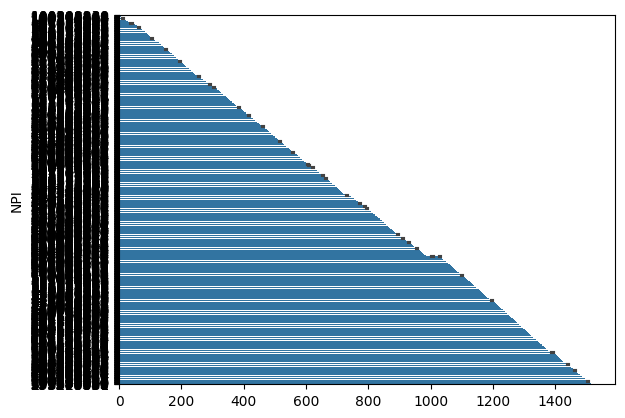

In [ ]:
sns.barplot(df['NPI'])

In hindsight My original assumption about there being a small number of providers was false. There are many providers, so a barplot is not really effective for viewing them

<Axes: ylabel='STATE'>

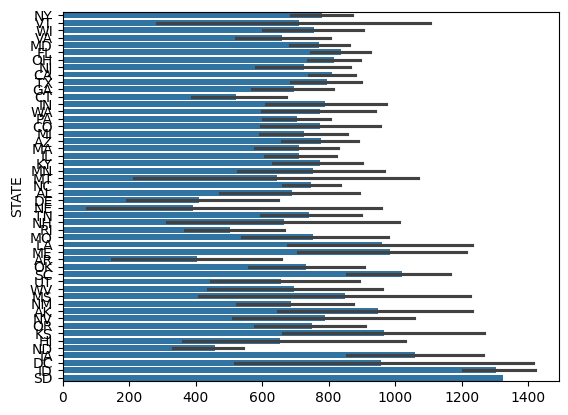

In [ ]:
sns.barplot(df['STATE'])

I could not do question 5-7 with my current dataset, so I picked a different one for those

In [9]:
med = pd.read_csv('/content/2014-2022 Medicare FFS Geographic Variation Public Use File.csv', low_memory=False)

In [10]:
.describe()

,YEAR,BENE_GEO_CD
count,30273.000000,30165.000000
mean,2018.000495,29013.187469
std,2.582255,16211.561420
min,2014.000000,1.000000
25%,2016.000000,17149.000000
50%,2018.000000,29025.000000
75%,2020.000000,45005.000000
max,2022.000000,78030.000000


In [12]:
med.head()

,YEAR,BENE_GEO_LVL,BENE_GEO_DESC,BENE_GEO_CD,BENE_AGE_LVL,BENES_TOTAL_CNT,BENES_WTH_PTAPTB_CNT,BENES_FFS_CNT,BENES_MA_CNT,MA_PRTCPTN_RATE,...,PQI11_BCTRL_PNA_AGE_LT_65,PQI11_BCTRL_PNA_AGE_65_74,PQI11_BCTRL_PNA_AGE_GE_75,PQI12_UTI_AGE_LT_65,PQI12_UTI_AGE_65_74,PQI12_UTI_AGE_GE_75,PQI15_ASTHMA_AGE_LT_40,PQI16_LWRXTRMTY_AMPUTN_AGE_LT_65,PQI16_LWRXTRMTY_AMPUTN_AGE_65_74,PQI16_LWRXTRMTY_AMPUTN_AGE_GE_75
0,2014,National,National,NaN,All,56767775,49302821,33462969,15839852,0.3213,...,686,499,1373,361,269,1120,286,147,50,47
1,2014,National,National,NaN,<65,9286837,7824336,5867170,1957166,0.2501,...,686,NaN,NaN,361,NaN,NaN,286,147,NaN,NaN
2,2014,National,National,NaN,>=65,47480938,41478485,27595799,13882686,0.3347,...,NaN,499,1373,NaN,269,1120,NaN,NaN,50,47
3,2014,State,AK,2.0,All,84573,71860,71383,477,0.0066,...,622,366,1271,181,152,703,*,130,*,72
4,2014,State,AK,2.0,<65,13294,11641,11578,63,0.0054,...,622,NaN,NaN,181,NaN,NaN,*,130,NaN,NaN


In [15]:
print(med['AMBLNC_MDCR_PYMT_PCT'].unique(), '\n')

['0.0144' '0.0177' '0.0136' '0.0238' '0.0223' '0.0241' '*' '0.0858'
 '0.0113' '0.0795' '0.0471' '0.019' '0.0598' '0.1006' '0.0335' '0.0251'
 '0.0492' '0.0219' '0.0494' '0.0166' '0.0074' '0.0345' '0.0878' '0.034'
 '0.0909' '0.0331' '0.054' '0.0452' '0.0346' '0.0894' '0.021' '0.0926'
 '0.0185' '0.0161' '0.0129' '0.013' '0.0199' '0.0149' '0.0168' '0.0164'
 '0.015' '0.0196' '0.0246' '0.0264' '0.0201' '0.0195' '0.0237' '0.0418'
 '0.0225' '0.0143' '0.0145' '0.0182' '0.0215' '0.0305' '0.0188' '0.0137'
 '0.0171' '0.0231' '0.0127' '0.0193' '0.017' '0.023' '0.0197' '0.0152'
 '0.0213' '0.0312' '0.0107' '0.011' '0.0133' '0.0234' '0.0123' '0.0187'
 '0.0126' '0.0178' '0.0248' '0.016' '0.0135' '0.0268' '0.0218' '0.0217'
 '0.0297' '0.0222' '0.024' '0.0356' '0.0147' '0.0121' '0.0253' '0.0191'
 '0.0132' '0.0169' '0.0175' '0.0267' '0.0153' '0.0179' '0.0146' '0.0211'
 '0.0044' '0.0066' '0.025' '0.0114' '0.0247' '0.0192' '0.0183' '0.0158'
 '0.0209' '0.0194' '0.0157' '0.0139' '0.0119' '0.0275' '0.0214' '0.0

In [20]:
med['OP_MDCR_STDZD_PYMT_PER_USER'] = pd.to_numeric(med['OP_MDCR_STDZD_PYMT_PER_USER'],errors='coerce')
med['OP_MDCR_STDZD_PYMT_PER_USER'].describe()

,OP_MDCR_STDZD_PYMT_PER_USER
count,29744.000000
mean,2688.538917
std,693.740654
min,567.380000
25%,2197.315000
50%,2580.850000
75%,3050.302500
max,14754.880000


In [18]:
med['AMBLNC_MDCR_STDZD_PYMT_PER_USER'] = pd.to_numeric(med['AMBLNC_MDCR_STDZD_PYMT_PER_USER'],errors='coerce')
med['AMBLNC_MDCR_STDZD_PYMT_PER_USER'].describe()

,AMBLNC_MDCR_STDZD_PYMT_PER_USER
count,29580.000000
mean,1169.520596
std,631.605428
min,0.000000
25%,826.347500
50%,987.115000
75%,1282.412500
max,9727.770000


<Axes: xlabel='OP_MDCR_STDZD_PYMT_PER_USER', ylabel='Count'>

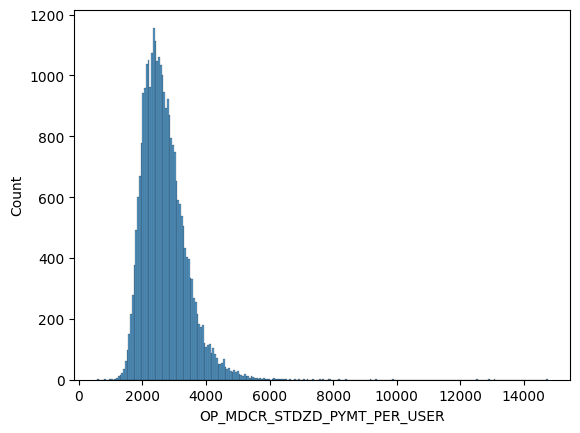

In [22]:
sns.histplot(med['OP_MDCR_STDZD_PYMT_PER_USER'])

THe standard payment amount for Medicare per user is typically between 2000 and about 3000.

<Axes: xlabel='OP_MDCR_STDZD_PYMT_PER_USER', ylabel='AMBLNC_MDCR_STDZD_PYMT_PER_USER'>

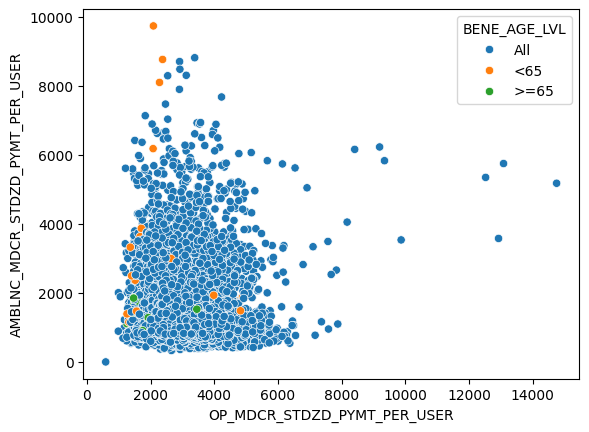

In [24]:
sns.scatterplot(med, x='OP_MDCR_STDZD_PYMT_PER_USER', y='AMBLNC_MDCR_STDZD_PYMT_PER_USER', hue = 'BENE_AGE_LVL')

It's a little hard to tell, but it seems like prices for people younger than 65 is greater for the ambulance payment than people over 65. The medicare payments seems to be similar in range

In [25]:
med['AMBLNC_MDCR_STDZD_PYMT_PER_USER'].describe()

,AMBLNC_MDCR_STDZD_PYMT_PER_USER
count,29580.000000
mean,1169.520596
std,631.605428
min,0.000000
25%,826.347500
50%,987.115000
75%,1282.412500
max,9727.770000


In [26]:
med['OP_MDCR_STDZD_PYMT_PER_USER'].describe()

,OP_MDCR_STDZD_PYMT_PER_USER
count,29744.000000
mean,2688.538917
std,693.740654
min,567.380000
25%,2197.315000
50%,2580.850000
75%,3050.302500
max,14754.880000


The mean medicare payment is about 1500 higher than the mean ambulance paym,ent per user. The range values (min and max) are also higher for medicare payments per user